In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


A prediction system was built to predict whether a home team will win it's match or not.
<br>
FTR is our target variable.
<br>
Key to results data:
<br>
Div = League Division
<br>
Date = Match Date (dd/mm/yy)
<br>
Time = Time of match kick-off
<br>
HomeTeam = Home Team
<br>
Away team = Away Team
<br>
FTHG and HG = Full Time Home Team Goals
<br>
FTAG and AG = Full-Time Away Team Goals
<br>
FTR and Res = Full-Time Result (H=Home Win, D=Draw, A=Away Win)
<br>
HTHG = Half Time Home Team Goals
<br>
HTAG = Half Time Away Team Goals
<br>
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
<br>
Match Statistics (where available)
<br>

Attendance = Crowd Attendance
<br>
Referee = Match Referee
<br>
HS = Home Team Shots
<br>
AS = Away Team Shots
<br>
HST = Home Team Shots on Target
<br>
AST = Away Team Shots on Target
<br>
HHW = Home Team Hit Woodwork
<br>
AHW = Away Team Hit Woodwork
<br>
HC = Home Team Corners
<br>
AC = Away Team Corners
<br>
HF = Home Team Fouls Committed
<br>
AF = Away Team Fouls Committed
<br>
HFKC = Home Team Free Kicks Conceded
<br>
AFKC = Away Team Free Kicks Conceded
<br>
HO = Home Team Offsides
<br>
AO = Away Team Offsides
<br>
HY = Home Team Yellow Cards
<br>
AY = Away Team Yellow Cards *HR = Home Team Red Cards AR = Away Team Red Cards HBP = Home Team Bookings Points (10 = yellow, 25 = red) ABP = Away Team Bookings Points (10 = yellow, 25 = red)

Data Analysis

In [4]:
df.isnull().sum()

Unnamed: 0       0
Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTGS             0
ATGS             0
HTGC             0
ATGC             0
HTP              0
ATP              0
HM1              0
HM2              0
HM3              0
HM4              0
HM5              0
AM1              0
AM2              0
AM3              0
AM4              0
AM5              0
MW               0
HTFormPtsStr     0
ATFormPtsStr     0
HTFormPts        0
ATFormPts        0
HTWinStreak3     0
HTWinStreak5     0
HTLossStreak3    0
HTLossStreak5    0
ATWinStreak3     0
ATWinStreak5     0
ATLossStreak3    0
ATLossStreak5    0
HTGD             0
ATGD             0
DiffPts          0
DiffFormPts      0
dtype: int64

In [5]:
df['FTR'].value_counts()

NH    3664
H     3176
Name: FTR, dtype: int64

In [6]:

per_won_by_hometeam = (len(df[df['FTR'] == 'H'])/len(df))*100
per_won_by_awayteam = 100 - per_won_by_hometeam

print(f'Percentage won by home team: {round(per_won_by_hometeam, 2)}%')
print(f'Percentage won by away team: {round(per_won_by_awayteam,2)}%')

Percentage won by home team: 46.43%
Percentage won by away team: 53.57%


<AxesSubplot:>

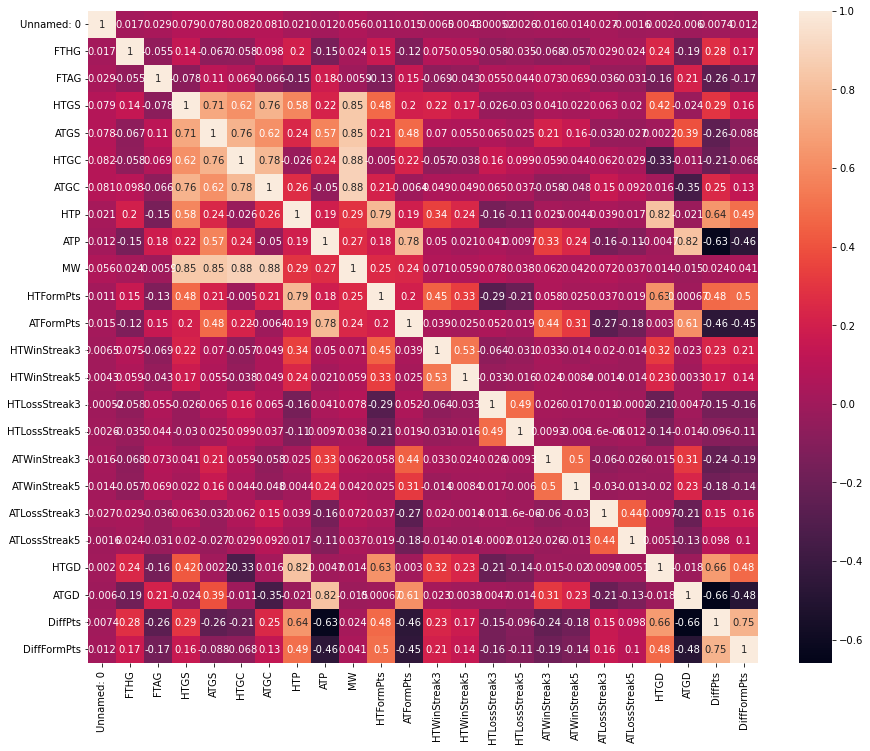

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot = True)

In [8]:
# Remove redundant column
df = df.drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'])

In [9]:
df.head()

,Unnamed: 0,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,0,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
1,1,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2,2,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
3,3,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
4,4,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0


In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,H,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
1,H,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
2,NH,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
3,NH,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
4,H,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
6835,H,1.078947,1.842105,L,L,L,D,W,W,-0.289474,0.710526,-0.263158
6836,NH,0.947368,2.552632,W,D,W,W,D,W,-0.473684,2.052632,-0.131579
6837,NH,0.868421,0.789474,L,L,L,L,D,D,-0.710526,-0.894737,-0.052632
6838,H,1.947368,1.236842,W,L,W,W,L,L,0.973684,-0.078947,0.078947


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FTR          6840 non-null   object 
 1   HTP          6840 non-null   float64
 2   ATP          6840 non-null   float64
 3   HM1          6840 non-null   object 
 4   HM2          6840 non-null   object 
 5   HM3          6840 non-null   object 
 6   AM1          6840 non-null   object 
 7   AM2          6840 non-null   object 
 8   AM3          6840 non-null   object 
 9   HTGD         6840 non-null   float64
 10  ATGD         6840 non-null   float64
 11  DiffFormPts  6840 non-null   float64
dtypes: float64(5), object(7)
memory usage: 641.4+ KB


In [13]:
df['FTR'] = df['FTR'].map({'H':1,'NH':0})

In [14]:
X,y = df.drop('FTR',axis=1), df['FTR']

In [15]:
X

,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
1,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
2,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
3,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
4,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
6835,1.078947,1.842105,L,L,L,D,W,W,-0.289474,0.710526,-0.263158
6836,0.947368,2.552632,W,D,W,W,D,W,-0.473684,2.052632,-0.131579
6837,0.868421,0.789474,L,L,L,L,D,D,-0.710526,-0.894737,-0.052632
6838,1.947368,1.236842,W,L,W,W,L,L,0.973684,-0.078947,0.078947


In [16]:
y

0       1
1       1
2       0
3       0
4       1
       ..
6835    1
6836    0
6837    0
6838    1
6839    1
Name: FTR, Length: 6840, dtype: int64

In [17]:
#1- home, 0-not home
df['FTR'].value_counts()

0    3664
1    3176
Name: FTR, dtype: int64

In [18]:
dummies= pd.get_dummies(X[['HM1','HM2','HM3','AM1','AM2','AM3']])

In [19]:
dummies

,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,HM2_W,HM3_D,HM3_L,...,AM1_M,AM1_W,AM2_D,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W
0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
6836,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
6837,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
6838,0,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [20]:
merged = pd.concat([X,dummies],axis=1)

In [21]:
merged

,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,...,AM1_M,AM1_W,AM2_D,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W
0,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,...,1,0,0,0,1,0,0,0,1,0
1,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,...,1,0,0,0,1,0,0,0,1,0
2,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,...,1,0,0,0,1,0,0,0,1,0
3,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,...,1,0,0,0,1,0,0,0,1,0
4,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,1.078947,1.842105,L,L,L,D,W,W,-0.289474,0.710526,...,0,0,0,0,0,1,0,0,0,1
6836,0.947368,2.552632,W,D,W,W,D,W,-0.473684,2.052632,...,0,1,1,0,0,0,0,0,0,1
6837,0.868421,0.789474,L,L,L,L,D,D,-0.710526,-0.894737,...,0,0,1,0,0,0,1,0,0,0
6838,1.947368,1.236842,W,L,W,W,L,L,0.973684,-0.078947,...,0,1,0,1,0,0,0,1,0,0


In [22]:
X = merged.drop(columns=['HM1','HM2','HM3','AM1','AM2','AM3'],axis=1)

In [23]:
X

,HTP,ATP,HTGD,ATGD,DiffFormPts,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,...,AM1_M,AM1_W,AM2_D,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W
0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,1.078947,1.842105,-0.289474,0.710526,-0.263158,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6836,0.947368,2.552632,-0.473684,2.052632,-0.131579,0,0,0,1,1,...,0,1,1,0,0,0,0,0,0,1
6837,0.868421,0.789474,-0.710526,-0.894737,-0.052632,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6838,1.947368,1.236842,0.973684,-0.078947,0.078947,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [26]:
X_train

,HTP,ATP,HTGD,ATGD,DiffFormPts,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,...,AM1_M,AM1_W,AM2_D,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W
1341,1.476190,0.714286,0.238095,-1.190476,0.238095,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1298,0.875000,0.687500,-0.625000,-1.312500,0.125000,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
298,1.400000,0.933333,0.500000,-0.133333,0.033333,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3715,0.633333,0.800000,-0.866667,-1.133333,0.033333,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5077,0.571429,1.928571,-1.142857,0.928571,-0.214286,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1644,1.000000,0.615385,0.076923,-1.153846,0.230769,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3502,1.444444,1.666667,0.333333,1.111111,-0.555556,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4218,0.750000,1.750000,-1.250000,0.500000,-1.000000,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [27]:
y_test

4337    0
5669    1
6221    1
738     1
1628    0
       ..
4830    1
765     1
5822    0
6817    0
6685    0
Name: FTR, Length: 1368, dtype: int64

In [28]:
ss = StandardScaler()

In [29]:
X_train_std = ss.fit_transform(X_train)

In [30]:
X_test_std = ss.transform(X_test)

In [31]:
y_train

1341    1
1298    1
298     1
3715    1
5077    0
       ..
3048    1
1644    0
3502    1
4218    0
3403    0
Name: FTR, Length: 5472, dtype: int64

Models

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train_std,y_train)

LogisticRegression()

In [35]:
y_predict = model.predict(X_test_std)

In [36]:
y_predict

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [37]:
y_predictt = pd.DataFrame(y_predict,columns=['y_predict'])

In [38]:
y_test

4337    0
5669    1
6221    1
738     1
1628    0
       ..
4830    1
765     1
5822    0
6817    0
6685    0
Name: FTR, Length: 1368, dtype: int64

In [39]:
final = pd.concat([y_predictt,y_test],axis=1)

In [40]:
final

,y_predict,FTR
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,NaN
4,1.0,NaN
...,...,...
6818,NaN,0.0
6823,NaN,0.0
6826,NaN,1.0
6829,NaN,0.0


In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       711
           1       0.67      0.59      0.63       657

    accuracy                           0.66      1368
   macro avg       0.67      0.66      0.66      1368
weighted avg       0.67      0.66      0.66      1368



In [45]:
from sklearn.metrics import  accuracy_score

lg_acc = accuracy_score(y_test,y_predict)
print(f'Accuracy in Logistic Regression is: {lg_acc}')

Accuracy in Logistic Regression is: 0.6644736842105263


In [46]:
from sklearn.svm import SVC

In [47]:
model = SVC()

In [48]:
model.fit(X_train,y_train)

SVC()

In [49]:
y_predict = model.predict(X_test_std)

C:\Users\DELL\anaconda3\envs\deeplnenv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [50]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.54      0.94      0.68       711
           1       0.66      0.13      0.22       657

    accuracy                           0.55      1368
   macro avg       0.60      0.53      0.45      1368
weighted avg       0.60      0.55      0.46      1368



In [51]:
svc_acc = accuracy_score(y_test,y_predict)
print(f'Accuracy in Support Vector Machine is: {svc_acc}')

Accuracy in Support Vector Machine is: 0.5504385964912281


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
model = DecisionTreeClassifier()

In [54]:
model.fit(X_train_std,y_train)

DecisionTreeClassifier()

In [55]:
y_predict = model.predict(X_test_std)

In [56]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       711
           1       0.52      0.49      0.51       657

    accuracy                           0.54      1368
   macro avg       0.54      0.54      0.54      1368
weighted avg       0.54      0.54      0.54      1368



In [57]:
dtc_acc = accuracy_score(y_test,y_predict)
print(f'Accuracy in Support Vector Machine is: {dtc_acc}')

Accuracy in Support Vector Machine is: 0.5394736842105263


In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
model = KNeighborsClassifier()

In [60]:
model.fit(X_train_std,y_train)

KNeighborsClassifier()

In [64]:
y_predict = model.predict(X_test_std)

In [65]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       711
           1       0.57      0.51      0.54       657

    accuracy                           0.58      1368
   macro avg       0.58      0.58      0.58      1368
weighted avg       0.58      0.58      0.58      1368



In [66]:
knnc_acc = accuracy_score(y_test,y_predict)
print(f'Accuracy in Support Vector Machine is: {knnc_acc}')

Accuracy in Support Vector Machine is: 0.5804093567251462


In [70]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

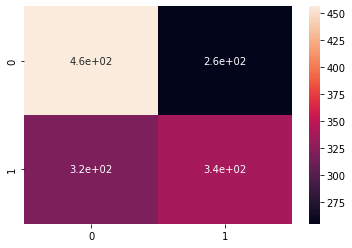

In [75]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

In [67]:
final = [lg_acc,svc_acc,dtc_acc,knnc_acc]
labels = ['Logistic Regression','Support Vector Machine','Decision Tree','K-Nearest Neighbors']

<AxesSubplot:>

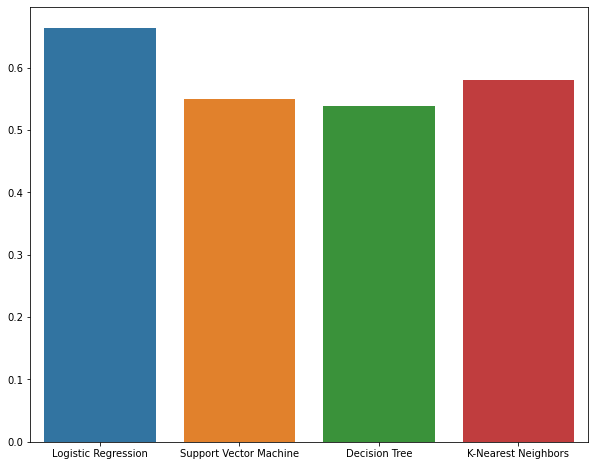

In [69]:
plt.figure(figsize=(10,8))
sns.barplot(x=labels,y=final)